In [139]:
# This Python coding can be used for Sinton Instrument WCT-120 or WCT-120TS measurement 
# file format should be in txt
# locate the files by inputting the address "ad" and "fl" 
# ad is for the main folder
# fl is for subfolder where you have saved your files
# change value of 'inj_ext' and 'inj_ext_j0' to decide where you want to extract values from

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import sys
import csv
import os
import openpyxl
import operator as op
import math as mt
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy import interpolate
# import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pandas import read_excel
from itertools import zip_longest
def intpl(x,y,xi): #Slightly simplified the interpolation 
    yy = interp1d(x,y, kind = 'linear')
    yi=yy(xi)
    return yi

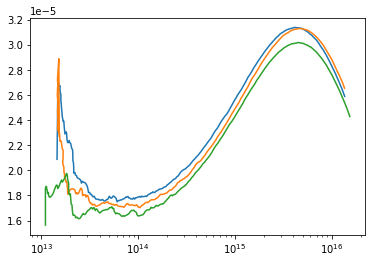

In [174]:
################ input inj value for extraction
inj_ext =1e14
inj_ext_j0 = 1e16
############ File Location
ad = 'C:/Users/z3397452/Data'  #location of the whole folder
fl = 'Textfiles' #subfolder
#################################

fn = os.listdir(ad+'/'+fl)   # Assigning the file names imagine you're one directory above test dir
LT_ext =[] # LT directory 
J0_ext = [] #J0 directory
fni =[] #filename directory
fnLT = []# assign file nameLT
DLSS =[]
rowLT2 = []
# for ii in range(0,len(fn)):
for ii in range(0,3):
    
    with open(ad+'/'+fl+'/'+fn[ii]) as file:
        data = [line.replace("> ","") for line in file.readlines()]
        inj=[]
        tau=[]
        j0=[]
        i=0
        for line in data:
                s = line.split("\t")
                i = i+1
                if i > 16:
                    inj.append(float(s[3]))
                    tau.append(float(s[4]))
                    j0.append(float(s[10]))
        LT_ext.append(intpl(inj,tau,inj_ext))
        J0_ext.append(intpl(inj,j0,inj_ext_j0))
        fni.append(fn[ii])
        plt.semilogx(inj,tau)
    
    fnLT.append("File Name")
    fnLT.append(fn[ii])
    rowLT2.append("Dn (/cm^3)")
    rowLT2.append("Tau (microsec)")
    DLSS.append(inj) 
    DLSS.append(tau)
    
    del inj,tau,i,s,j0

d = [fni, LT_ext,J0_ext,[inj_ext],[inj_ext_j0]]
dLT = DLSS
export_data_ext = zip_longest(*d, fillvalue = '')
export_data_LTcurves = zip_longest(*dLT, fillvalue = '')
with open(ad+'/'+'Extracted values_'+fl+'.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("File Name", "Tau (microsec)", "J0 (A/cm2)", "Dn (/cm^3) for LT", "Dn (/cm^3) for J0"))
      wr.writerows(export_data_ext)
myfile.close()

with open(ad+'/'+'Extracted LTcurves_'+fl+'.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow((fnLT))
    wr.writerows([rowLT2])
    wr.writerows(export_data_LTcurves)
myfile.close()
